In [1]:
import re
from collections import defaultdict
import statistics

# Initialize data structures to hold the extracted information
parameters = {}
original_model_metrics = []
original_model_rewards = []
chosen_rewards = defaultdict(list)
rejected_rewards = defaultdict(list)
evaluation_metrics = defaultdict(list)
evaluation_rewards = defaultdict(list)

# Define regex patterns for extracting the data
param_pattern = re.compile(r"Parameters:\s*\n"
                           r".*num_iterations: (?P<num_iterations>\d+)\s*\n"
                           r".*data_size_per_iteration: (?P<data_size_per_iteration>\d+)\s*\n"
                           r".*sample_size: (?P<sample_size>\d+)\s*\n"
                           r".*beta: (?P<beta>[\d.]+)\s*\n"
                           r".*timestep: (?P<timestep>\S+)")
metrics_pattern = re.compile(r"Original model metrics:\s*(?P<metrics>\[.*\])")
rewards_pattern = re.compile(r"Original model rewards:\s*(?P<rewards>\[.*\])")
chosen_rewards_pattern = re.compile(r"Chosen rewards for iteration (?P<iter>\d+):\s*(?P<rewards>\[.*\])")
rejected_rewards_pattern = re.compile(r"Rejected rewards for iteration (?P<iter>\d+):\s*(?P<rewards>\[.*\])")
eval_metrics_pattern = re.compile(r"Evaluation metrics for iteration (?P<iter>\d+):\s*(?P<metrics>\[.*\])")
eval_rewards_pattern = re.compile(r"Evaluation rewards for iteration (?P<iter>\d+):\s*(?P<rewards>\[.*\])")

# Read the log file
with open('/work/b0990106x/trl/model_output/0718-1922/log_training.log', 'r') as file:
    log_content = file.read()

# Extract and save parameters
params_match = param_pattern.search(log_content)
if params_match:
    parameters = params_match.groupdict()

# Extract and save original model metrics
metrics_match = metrics_pattern.search(log_content)
if metrics_match:
    original_model_metrics = eval(metrics_match.group('metrics'))

# Extract and save original model rewards
rewards_match = rewards_pattern.search(log_content)
if rewards_match:
    original_model_rewards = eval(rewards_match.group('rewards'))

# Extract and save chosen and rejected rewards for each iteration
chosen_rewards_matches = chosen_rewards_pattern.findall(log_content)
for match in chosen_rewards_matches:
    iter_idx, rewards = match
    chosen_rewards[int(iter_idx)] = eval(rewards)

rejected_rewards_matches = rejected_rewards_pattern.findall(log_content)
for match in rejected_rewards_matches:
    iter_idx, rewards = match
    rejected_rewards[int(iter_idx)] = eval(rewards)

# Extract and save evaluation metrics and rewards for each iteration
eval_metrics_matches = eval_metrics_pattern.findall(log_content)
for match in eval_metrics_matches:
    iter_idx, metrics = match
    evaluation_metrics[int(iter_idx)] = eval(metrics)

eval_rewards_matches = eval_rewards_pattern.findall(log_content)
for match in eval_rewards_matches:
    iter_idx, rewards = match
    evaluation_rewards[int(iter_idx)] = eval(rewards)

# Calculate and print the mean of the evaluation rewards for each iteration
mean_evaluation_rewards = {}
sublist_means = defaultdict(list)

for iter_idx, rewards_list in evaluation_rewards.items():
    sublist_means[iter_idx] = [statistics.mean(sublist) for sublist in rewards_list if sublist and all(reward is not None for reward in sublist)]
    # Flatten the list of lists and calculate the mean
    flat_rewards = [reward for sublist in rewards_list for reward in sublist if reward is not None]
    mean_evaluation_rewards[iter_idx] = statistics.mean(flat_rewards) if flat_rewards else None

In [2]:
# Print the extracted information for verification
print("Parameters:", parameters)
print("Original Model Metrics:", original_model_metrics)
print("Original Model Rewards:", original_model_rewards)
print("Chosen Rewards:", dict(chosen_rewards))
print("Rejected Rewards:", dict(rejected_rewards))
print("Evaluation Metrics:", dict(evaluation_metrics))
print("Evaluation Rewards:", dict(evaluation_rewards))

Parameters: {'num_iterations': '20', 'data_size_per_iteration': '10', 'sample_size': '10', 'beta': '0.1', 'timestep': '0718-1922'}
Original Model Metrics: [{'idx': 0, 'metrics': {'mean': 2.2823617458343506, 'median': 2.265607237815857, 'std_dev': 0.12770641384153686, 'variance': 0.016308928136265877, 'min': 2.115590810775757, 'max': 2.567842721939087, '25th_percentile': 2.174967646598816, '75th_percentile': 2.3582539558410645, 'rewards': [2.115590810775757, 2.339708089828491, 2.2441139221191406, 2.2871005535125732, 2.161966562271118, 2.370398759841919, 2.213970899581909, 2.567842721939087, 2.158489227294922, 2.364435911178589]}}, {'idx': 1, 'metrics': {'mean': 1.9351346731185912, 'median': 1.8771568536758423, 'std_dev': 0.17780536277766548, 'variance': 0.031614747032497226, 'min': 1.776851773262024, 'max': 2.39255428314209, '25th_percentile': 1.824241191148758, '75th_percentile': 2.0005521178245544, 'rewards': [1.784714698791504, 1.776851773262024, 2.036564588546753, 2.39255428314209, 

In [3]:
print("Mean Evaluation Rewards:", mean_evaluation_rewards)
print("Sublist Means for Each Iteration:", dict(sublist_means))

Mean Evaluation Rewards: {0: 2.304453012943268, 1: 2.200520441089709, 2: 1.8156515204906463, 3: 2.2567397070967634, 4: 2.202212582877342, 5: 2.2578063823364594, 6: 2.092922942978995}
Sublist Means for Each Iteration: {0: [2.2616039514541626, 2.0083584547042848, 2.5706634759902953, 2.0004489183425904, 2.2864267826080322, 2.642468476295471, 2.0431250810623167, 2.5663666248321535, 2.322256565093994, 2.3428117990493775], 1: [2.5620423793792724, 2.134258234500885, 2.479455804824829, 1.7026401042938233, 1.6068248569965362, 2.3580774784088137, 2.34587619304657, 2.7020793080329897, 2.3895814180374146], 2: [2.484474754333496, 1.894647228717804, 2.376831555366516, 1.4764175176620484, 1.490692639350891, 1.192516165971756, 0.8365750968456268, 2.4022517919540407, 1.8482767343521118, 2.153831720352173], 3: [2.2554027318954466, 1.9211999654769898, 2.5035401821136474, 1.947227668762207, 2.447009193897247, 1.6106164455413818, 2.618821310997009, 3.0032352209091187, 2.0930341839790345], 4: [2.47531762123

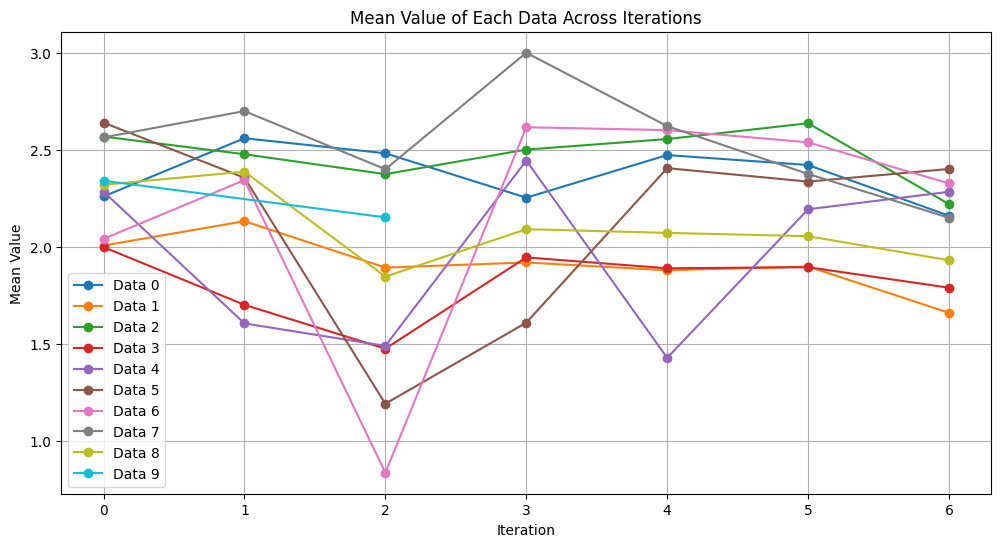

In [4]:
import matplotlib.pyplot as plt

# Reorganize data for plotting
plot_data = defaultdict(list)
for iter_idx, means in sublist_means.items():
    for sublist_idx, mean in enumerate(means):
        plot_data[sublist_idx].append((iter_idx, mean))

# Plotting
plt.figure(figsize=(12, 6))
for sublist_idx, data in plot_data.items():
    data.sort()  # Ensure the data is sorted by iteration
    x_axis, y_axis = zip(*data)
    plt.plot(x_axis, y_axis, marker='o', label=f'Data {sublist_idx}')

plt.xlabel('Iteration')
plt.ylabel('Mean Value')
plt.title('Mean Value of Each Data Across Iterations')
plt.legend()
plt.grid(True)
plt.show()